#### Contributor: Meghesh Saini

# EDA - PART 1

In [1]:
#importing libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
#Loading cleaned dataset
df=pd.read_csv("~/AAI-500-IN1_PROJECT/data/Processed/01_data_cleaning.csv")
df.head() #checking the dataset columns

# Ensure the output directory exists
output_dir = "~/AAI-500-IN1_PROJECT/visuals/eda_charts"
os.makedirs(output_dir, exist_ok=True)

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Year,Month,Week,weekday,Region,TotalSales
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,2019,12,50,Monday,Europe,257.64
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,2019,12,50,Monday,Europe,383.40
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,2019,12,50,Monday,Europe,138.36
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,2019,12,50,Monday,Europe,127.80
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,2019,12,50,Monday,Europe,71.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531090,C536548,2018-12-01,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany,2018,12,48,Saturday,Europe,-37.92
531091,C536548,2018-12-01,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany,2018,12,48,Saturday,Europe,-42.27
531092,C536548,2018-12-01,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany,2018,12,48,Saturday,Europe,-11.74
531093,C536548,2018-12-01,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany,2018,12,48,Saturday,Europe,-65.40


In [11]:
#Performing some basic calculations
total_sales=df[df['TotalSales'] > 0]['TotalSales'].sum() #Total sale value >0 avoids cancellations.
print('Total sale value in units is ', int(total_sales), ' Dollars. The total value is obtained by multiplying the price and the quantity sold. \nAdding up these values to get total sale' )
print('There are a total of', len(df), 'rows in the dataset.')

Total sale value in units is  62781304  Dollars. The total value is obtained by multiplying the price and the quantity sold. 
Adding up these values to get total sale
There are a total of 531095 rows in the dataset.


## Total Sales per Country

In [12]:
# Sales by Country (only positive sales)
# Filter only positive TotalSales values
df_positive = df[df["TotalSales"] > 0] #creating a new dataset of positive sales value for further calculations

# Group by Country and sum the TotalSales
sales_by_country = df_positive.groupby("Country")["TotalSales"].sum().reset_index()

# Sort by TotalSales in descending order (optional)
sales_by_country = sales_by_country.sort_values(by="TotalSales", ascending=False).reset_index(drop=True)

# Show the result
print('The total sales in Dollars grouped by countries \n')
print(sales_by_country)
print('The total number of values in this dataset is: ' , df_positive.shape[0])

The total sales in Dollars grouped by countries 

                 Country   TotalSales
0         United Kingdom  52346795.60
1            Netherlands   2151553.59
2                   EIRE   1711819.39
3                Germany   1369839.62
4                 France   1329903.39
5              Australia    995414.01
6                 Sweden    401879.89
7            Switzerland    361691.96
8                  Japan    293155.44
9                  Spain    280843.80
10               Belgium    272131.88
11                Norway    188612.52
12              Portugal    175959.28
13               Finland    120972.15
14               Denmark    101083.99
15       Channel Islands     95932.24
16                 Italy     78536.24
17               Austria     69147.26
18             Singapore     63480.95
19                Cyprus     61614.64
20                Israel     54722.14
21               Iceland     38307.42
22                   USA     32846.41
23           Unspecified     32638.74


#### Observation: From this, we derive that no of positive transactions are 522601 and no of cancelled transactions are 8494.

## Plotting the Bar Graph of Country and Sale

#### Findings:
    - Highlights which countries contribute the most to revenue.
    - Enables stakeholders to understand the geographical spread of sales.
    - Provides a foundation for focusing marketing and sales efforts in high‑potential regions.



Plotting Total sales Country wise


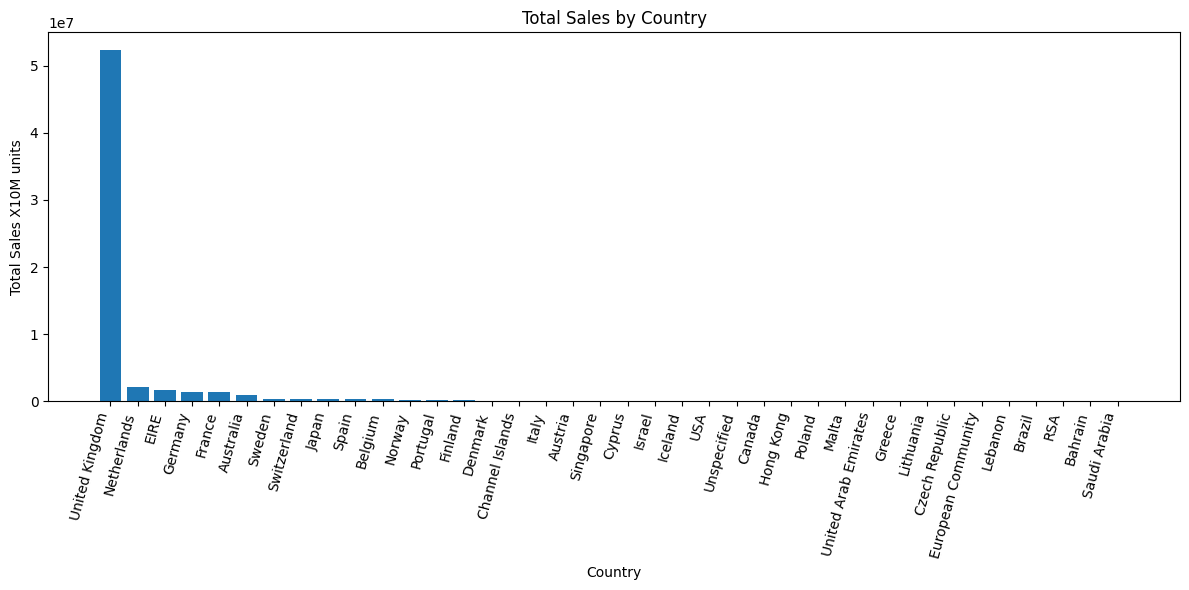

output saved at: /home/Isha/USD/usd_project_aai_500/AAI-500-IN1_PROJECT/visuals/eda_charts/TotalSales_per_country.png


In [13]:
#Plotting the bar graph of Country and Sale to get an Idea of global reach
print('Plotting Total sales Country wise')
plt.figure(figsize=(12, 6))
plt.bar(sales_by_country["Country"], sales_by_country["TotalSales"])
plt.xticks(rotation=75, ha='right')
plt.xlabel("Country")
plt.ylabel("Total Sales X10M units")
plt.title("Total Sales by Country")
plt.tight_layout()

# Save the figure
output_file = os.path.join(output_dir, "TotalSales_per_country.png")
plt.savefig(output_file, dpi=300, bbox_inches='tight')

plt.show() #plotting the results of sale value by country

print(f"output saved at: {output_file}")

## Per‑Capita Sales (Total Sale Value ÷ Number of Customers)


In [14]:
#Total sale per Capita = Total sale value/No of customers in that country

# Total sales by country
total_salesc = df_positive.groupby("Country")["TotalSales"].sum()

# Number of Unique customers by country
unique_customers = df_positive.groupby("Country")["CustomerNo"].nunique()

# Per Customer sales = total sales / unique customers
per_capita_sales = (total_salesc / unique_customers).astype(int).reset_index()
per_capita_sales.columns = ["Country", "Per Customer Sale"]

# Sorting in descending order and resetting index
per_capita_sales = per_capita_sales.sort_values(by="Per Customer Sale", ascending=False).reset_index(drop=True)

# Show the values
print('The value of per customer sale based on (total sale in the country / no on customers in the country)\n')
print(per_capita_sales)

The value of per customer sale based on (total sale in the country / no on customers in the country)

                 Country  Per Customer Sale
0            Netherlands             239061
1                   EIRE             131678
2              Australia             110601
3              Singapore              63480
4                 Sweden              57411
5                Iceland              38307
6                  Japan              36644
7                 Norway              23576
8            Switzerland              17223
9                 France              15286
10               Germany              15053
11       Channel Islands              13704
12                Israel              13680
13               Belgium              12369
14                 Spain              12210
15        United Kingdom              12159
16               Austria              11524
17               Denmark              11231
18                Cyprus              10269
19               F

The graph shows per customer sales by country



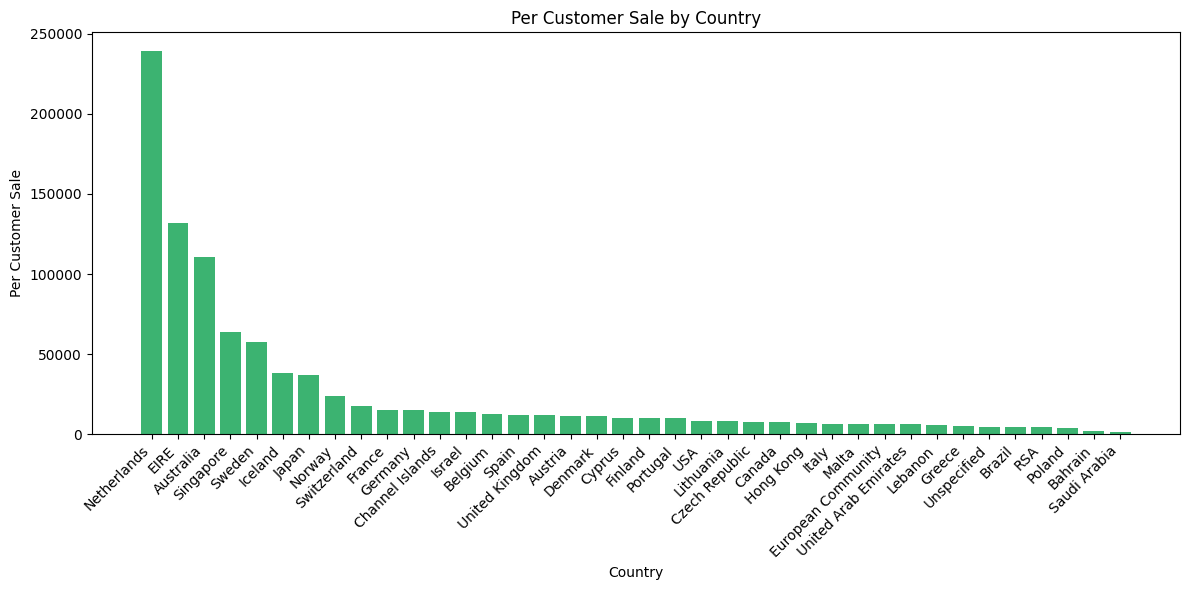

output saved at: /home/Isha/USD/usd_project_aai_500/AAI-500-IN1_PROJECT/visuals/eda_charts/PerCustomerSalesByCountry.png


In [15]:
# Plotting Per capita sales to know what countries have highest per capital sales
print('The graph shows per customer sales by country\n')
plt.figure(figsize=(12, 6))
plt.bar(per_capita_sales["Country"], per_capita_sales["Per Customer Sale"], color="mediumseagreen")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Per Customer Sale")
plt.title("Per Customer Sale by Country")
plt.tight_layout()
# Save the figure
output_file = os.path.join(output_dir, "PerCustomerSalesByCountry.png")
plt.savefig(output_file, dpi=300, bbox_inches='tight')

plt.show() #plotting the results of sale value by country

print(f"output saved at: {output_file}")

#### Finding: This suggests that countries Netherlands, Ireland, Australia have high value customers as compared to other countries

## Weekday Sales Analysis

The following graph shows sales on the days of the week



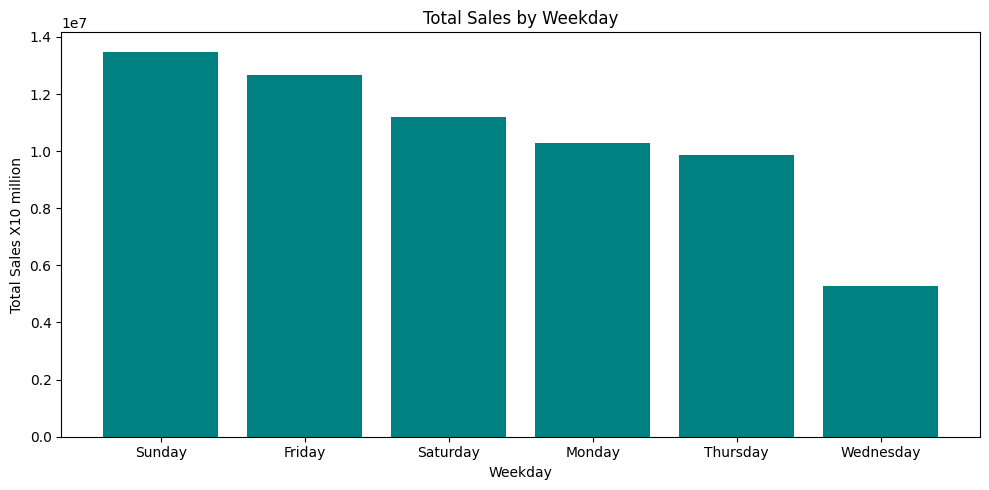

output saved at: /home/Isha/USD/usd_project_aai_500/AAI-500-IN1_PROJECT/visuals/eda_charts/Weekday_sales_Analysis.png


In [16]:
#Weekday sales
#calculating sales based on the day of the week like Monday, Tuesday and so on...

# Group by weekday and sum total sales
sales_by_weekday = df_positive.groupby("weekday")["TotalSales"].sum()

# Sort in descending order
sales_by_weekday = sales_by_weekday.sort_values(ascending=False)

# Plot
print('The following graph shows sales on the days of the week\n')
plt.figure(figsize=(10, 5))
plt.bar(sales_by_weekday.index, sales_by_weekday.values, color="teal")
plt.xlabel("Weekday")
plt.ylabel("Total Sales X10 million")
plt.title("Total Sales by Weekday")
plt.tight_layout()
# Save the figure
output_file = os.path.join(output_dir, "Weekday_sales_Analysis.png")
plt.savefig(output_file, dpi=300, bbox_inches='tight')

plt.show() #plotting the results of sale value by country

print(f"output saved at: {output_file}")

#### Findings:
    - The following graph shows sales on the days of the week. Weekend sales are the highest, almost 70% of the whole week.
    - Wednesdays have the lowest sales in the weekdays.

## Weekday Slot per Month Heatmap

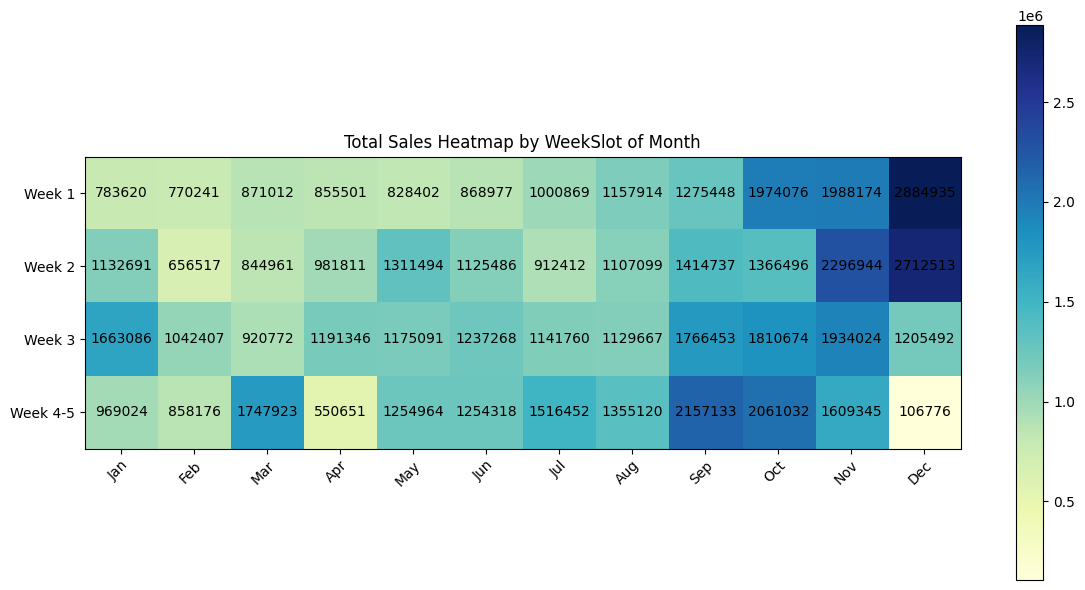

output saved at: /home/Isha/USD/usd_project_aai_500/AAI-500-IN1_PROJECT/visuals/eda_charts/TotalSales_heatmap_weekslot_of_month.png


In [17]:
# Weekday slot per month heatmap (only positive sales)
import numpy as np
# Convert to datetime and extract day/month
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df["Day"] = df["Date"].dt.day
df["Month"] = df["Date"].dt.month

# Assign WeekSlot
def assign_week_slot(day):
    if day <= 7:
        return "Week 1"
    elif 8 <= day <= 14:
        return "Week 2"
    elif 15 <= day <= 21:
        return "Week 3"
    else:
        return "Week 4-5"

df["WeekSlot"] = df["Day"].apply(assign_week_slot)

# Filter only positive sales
df_positive = df[df["TotalSales"] > 0]

# Group and pivot
sales_by_weekslot = df_positive.groupby(["WeekSlot", "Month"])["TotalSales"].sum().reset_index()
sales_pivot = sales_by_weekslot.pivot(index="WeekSlot", columns="Month", values="TotalSales")

# Define correct order for WeekSlot and months
weekslot_order = ["Week 1", "Week 2", "Week 3", "Week 4-5"]
month_order = list(range(1, 13))  # Jan to Dec

# Reindex to preserve order and ensure missing values are filled with 0
sales_pivot = sales_pivot.reindex(index=weekslot_order, columns=month_order)
sales_pivot = sales_pivot.fillna(0)

# Rename month columns for display
sales_pivot.columns = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                       "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Prepare data for heatmap
data = sales_pivot.values
fig, ax = plt.subplots(figsize=(12, 6))
cax = ax.imshow(data, cmap="YlGnBu")

# Set axis ticks
ax.set_xticks(np.arange(data.shape[1]))
ax.set_yticks(np.arange(data.shape[0]))
ax.set_xticklabels(sales_pivot.columns)
ax.set_yticklabels(sales_pivot.index)  #  Week labels are back here

# Rotate x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Annotate cells with values
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        val = int(data[i, j])
        if val > 0:  # Optional: show only if greater than 0
            ax.text(j, i, f"{val}", ha="center", va="center", color="black")

# Add title and color bar
ax.set_title("Total Sales Heatmap by WeekSlot of Month")
fig.colorbar(cax)
plt.tight_layout()
# Save the figure
output_file = os.path.join(output_dir, "TotalSales_heatmap_weekslot_of_month.png")
plt.savefig(output_file, dpi=300, bbox_inches='tight')

plt.show() #plotting the results of sale value by country

print(f"output saved at: {output_file}")

## Calculating Total Sales by WeekSlot (All Months Combined)

In [18]:
#Calculating the total value (Column totals from above)

df["WeekSlot"] = df_positive["Day"].apply(assign_week_slot)

# Group total sales by WeekSlot (all months combined)
total_sales_by_week = df_positive.groupby("WeekSlot")["TotalSales"].sum().reindex(["Week 1", "Week 2", "Week 3", "Week 4-5"])

# Display values
print('Adding up the rows and getting the week total for each week')
print(total_sales_by_week)

Adding up the rows and getting the week total for each week
WeekSlot
Week 1      15259174.13
Week 2      15863167.52
Week 3      16218044.15
Week 4-5    15440918.74
Name: TotalSales, dtype: float64


## Dominant Week Group per Month

/tmp/ipykernel_4217/1707728379.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive['WeekGroup'] = df_positive['Week'].apply(


Best performing WeekGroup in Each Month:

    Month WeekGroup  TotalSales
0       1     Week1  4548423.47
1       2     Week1  2052232.91
2       3     Week2  4384669.82
3       4     Week3  2723808.94
4       5     Week3  4198802.10
5       6   Week4-5  4486050.15
6       7   Week4-5  4571494.88
7       8   Week4-5  4749801.23
8       9   Week4-5  6613772.79
9      10   Week4-5  7212279.85
10     11   Week4-5  7828489.53
11     12   Week4-5  6909717.91


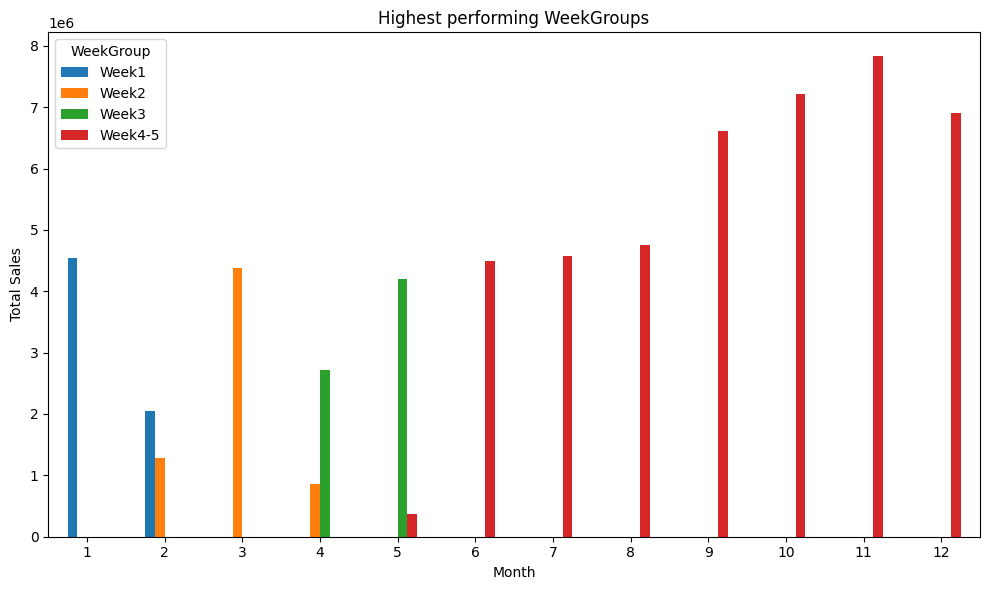

output saved at: /home/Isha/USD/usd_project_aai_500/AAI-500-IN1_PROJECT/visuals/eda_charts/Dominant_week_group_per_month.png


In [19]:
#calculating the dominant week amongst the 1st or 2nd or 3rd or 4the week of the month.
#Dominant week is the week in which we had the highest sale of the month.

# Ensure week group is categorical and ordered correctly
df_positive['WeekGroup'] = df_positive['Week'].apply(
    lambda w: 'Week1' if w in [1, 2, 3, 4, 5, 6, 7] else
              'Week2' if w in [8, 9, 10, 11, 12, 13, 14] else
              'Week3' if w in [15, 16, 17, 18, 19, 20, 21] else
              'Week4-5'
)

# Group by Month and WeekGroup and sum TotalSales
weekly_monthly_sales = df_positive.groupby(['Month', 'WeekGroup'])['TotalSales'].sum().reset_index()

# For each month, find the WeekGroup with highest sales
best_weeks = weekly_monthly_sales.sort_values(['Month', 'TotalSales'], ascending=[True, False]).drop_duplicates('Month')

# Clean up output
best_weeks = best_weeks.sort_values('Month').reset_index(drop=True)
print("Best performing WeekGroup in Each Month:\n")
print(best_weeks)

import matplotlib.pyplot as plt

pivot_table = weekly_monthly_sales.pivot(index='Month', columns='WeekGroup', values='TotalSales')
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title("Highest performing WeekGroups")
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.xticks(rotation=0)
plt.legend(title="WeekGroup")
plt.tight_layout()
# Save the figure
output_file = os.path.join(output_dir, "Dominant_week_group_per_month.png")
plt.savefig(output_file, dpi=300, bbox_inches='tight')

plt.show() #plotting the results of sale value by country

print(f"output saved at: {output_file}")

#### Finding: The dominant weeks in the second half of the year is the last week of the corresponding month.

## Total Weekly Sales Bar Graph

This graph shows the total sale in each week


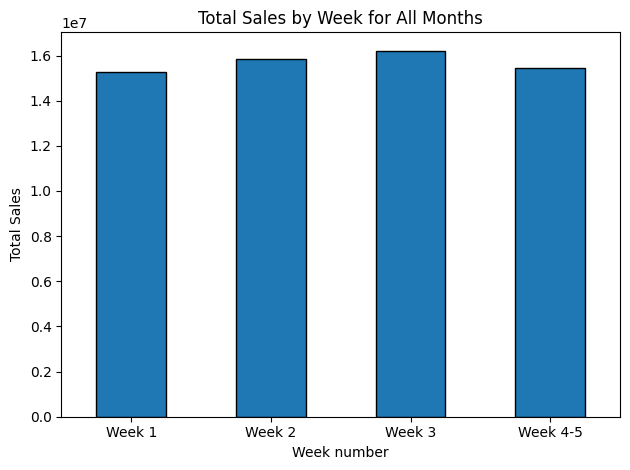

output saved at: /home/Isha/USD/usd_project_aai_500/AAI-500-IN1_PROJECT/visuals/eda_charts/Total_weekly_sales_BarGraph.png


In [20]:
# Plot bar graph for total weekly Sales

print('This graph shows the total sale in each week')
total_sales_by_week.plot(kind="bar", edgecolor="black")
plt.title("Total Sales by Week for All Months")
plt.xlabel("Week number")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.tight_layout()
# Save the figure
output_file = os.path.join(output_dir, "Total_weekly_sales_BarGraph.png")
plt.savefig(output_file, dpi=300, bbox_inches='tight')

plt.show() #plotting the results of sale value by country

print(f"output saved at: {output_file}")

#### Finding: There is hardly any difference in the overall weekly sales on a cumulative basis

## Top 20 and Bottom 20 Products in Sales

In [21]:
#Top 20 Products in Sales, 
#Bottom 20 Products in Sales.

# Create a lookup for ProductNo
product_names = df_positive.dropna(subset=["ProductName"]).drop_duplicates("ProductNo").set_index("ProductNo")["ProductName"]

# Group by ProductNo TotalSales
product_sales = df_positive.groupby("ProductNo")["TotalSales"].sum().dropna()

# Taking only positive sales values (Avoiding cancellations, as we will calculate cancellations later)
product_sales = product_sales[product_sales > 0]

# Get Top 20 and Bottom 20 ProductNos
top_20 = product_sales.sort_values(ascending=False).head(20)
bottom_20 = product_sales.sort_values().head(20)

# Merge names
top_20_named = top_20.to_frame(name="TotalSales")
top_20_named["ProductName"] = top_20_named.index.map(product_names)

bottom_20_named = bottom_20.to_frame(name="TotalSales")
bottom_20_named["ProductName"] = bottom_20_named.index.map(product_names)

# Print results
print("Top 20 Products by Total Sales:")
for idx, row in top_20_named.iterrows():
    print(f"ProductNo: {idx} |  Name: {row['ProductName']} | Total Sales: {row['TotalSales']:.2f}")

print("\n  Bottom 20 Products by Total Sales:")
for idx, row in bottom_20_named.iterrows():
    print(f"ProductNo: {idx} |  Name: {row['ProductName']} | Total Sales: {row['TotalSales']:.2f}")

Top 20 Products by Total Sales:
ProductNo: 23843 |  Name: Paper Craft Little Birdie | Total Sales: 1002718.10
ProductNo: 23166 |  Name: Medium Ceramic Top Storage Jar | Total Sales: 881990.18
ProductNo: 22197 |  Name: Popcorn Holder | Total Sales: 587222.66
ProductNo: 84077 |  Name: World War 2 Gliders Asstd Designs | Total Sales: 568722.59
ProductNo: 85123A |  Name: Cream Hanging Heart T-Light Holder | Total Sales: 484354.72
ProductNo: 84879 |  Name: Assorted Colour Bird Ornament | Total Sales: 420132.72
ProductNo: 21212 |  Name: Pack Of 72 Retrospot Cake Cases | Total Sales: 391241.08
ProductNo: 23084 |  Name: Rabbit Night Light | Total Sales: 328529.51
ProductNo: 22423 |  Name: Regency Cakestand 3 Tier | Total Sales: 306900.94
ProductNo: 85099B |  Name: Jumbo Bag Red Retrospot | Total Sales: 296584.47
ProductNo: 22492 |  Name: Mini Paint Set Vintage | Total Sales: 287001.66
ProductNo: 47566 |  Name: Party Bunting | Total Sales: 286412.55
ProductNo: 22178 |  Name: Victorian Glass Han

## World Map Plot of Sales Value

/tmp/ipykernel_4217/823921968.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4217/823921968.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



This graph shows the total value of sale based on color-coding in that country


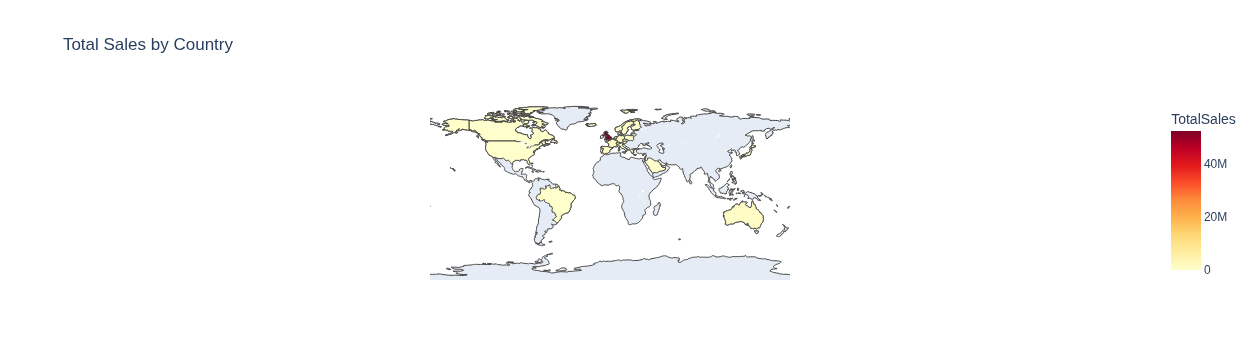

output saved at: /home/Isha/USD/usd_project_aai_500/AAI-500-IN1_PROJECT/visuals/eda_charts/World_map_plot_Sales_value.png


<Figure size 640x480 with 0 Axes>

In [23]:
#Plotting the World map for sale value

import plotly.express as px
df_positive["TotalSales"] = pd.to_numeric(df["TotalSales"], errors="coerce")
df_positive["Country"] = df_positive["Country"].str.strip()  # Remove trailing spaces

# Group total sales by country
country_sales = df_positive.groupby("Country")["TotalSales"].sum().reset_index()
print('This graph shows the total value of sale based on color-coding in that country')
# Plot using plotly
fig = px.choropleth(
    country_sales,
    locations="Country",
    locationmode="country names",
    color="TotalSales",
    color_continuous_scale="YlOrRd",
    title=" Total Sales by Country",
)

fig.update_layout(geo=dict(showframe=False, showcoastlines=True))

# Save the figure
output_file = os.path.join(output_dir, "World_map_plot_Sales_value.png")
plt.savefig(output_file, dpi=300, bbox_inches='tight')

fig.show()

print(f"output saved at: {output_file}")


## Plotting Price Distribution for Products

/tmp/ipykernel_4217/1755665222.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



The following graphs shows price distribution in the data


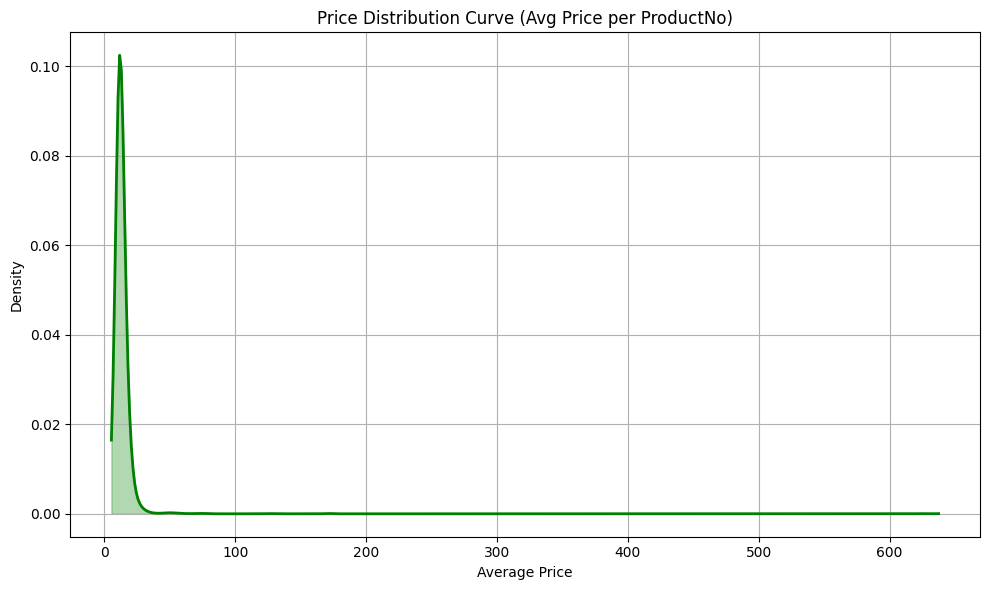

output saved at: /home/Isha/USD/usd_project_aai_500/AAI-500-IN1_PROJECT/visuals/eda_charts/Price_Distribution_for_products.png


In [24]:
#Plotting the price graphs to know average price, and its variance across the data

from scipy.stats import gaussian_kde
df_positive["Price"] = pd.to_numeric(df["Price"], errors="coerce")

# Average price per ProductNo because there a price variation for different days so taking the mean price for calculations

avg_price = df_positive.groupby("ProductNo")["Price"].mean().dropna()

# KDE computation
kde = gaussian_kde(avg_price)
x_vals = np.linspace(avg_price.min(), avg_price.max(), 500)
y_vals = kde(x_vals)

print('The following graphs shows price distribution in the data')
# Plotting for clarity
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, color="green", linewidth=2)
plt.fill_between(x_vals, y_vals, alpha=0.3, color="green")
plt.title("Price Distribution Curve (Avg Price per ProductNo)")
plt.xlabel("Average Price")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()
# Save the figure
output_file = os.path.join(output_dir, "Price_Distribution_for_products.png")
plt.savefig(output_file, dpi=300, bbox_inches='tight')

plt.show()

print(f"output saved at: {output_file}")


#### Finding: This graph shows price distribution variation in the dataset

## Customers with Most Frequent Transactions

In [25]:
#Getting the customers who made the most frequent transaction and their value

df_positive["CustomerNo"] = pd.to_numeric(df["CustomerNo"], errors="coerce")
df_positive["TotalSales"] = pd.to_numeric(df["TotalSales"], errors="coerce")

# Group by CustomerNo
customer_group = df.groupby("CustomerNo").agg(
    TransactionCount=("TransactionNo", "count"),
    TotalPurchaseValue=("TotalSales", "sum")
).dropna()

# Get top 20 customers by frequency of transactions
top_20_customers = customer_group.sort_values(by="TransactionCount", ascending=False).head(20)

# Display
print(" Top 20 Customers with highest number of transactions and their Purchase Value:\n")
for idx, row in top_20_customers.iterrows():
    print(f"CustomerNo: {int(idx)} | Transactions: {row['TransactionCount']} | Total Purchase Value: {row['TotalPurchaseValue']:.2f}")

 Top 20 Customers with highest number of transactions and their Purchase Value:

CustomerNo: 17841 | Transactions: 7803.0 | Total Purchase Value: 250424.13
CustomerNo: 14911 | Transactions: 5794.0 | Total Purchase Value: 872608.57
CustomerNo: 14096 | Transactions: 5093.0 | Total Purchase Value: 177814.26
CustomerNo: 12748 | Transactions: 4456.0 | Total Purchase Value: 249639.54
CustomerNo: 14606 | Transactions: 2751.0 | Total Purchase Value: 69497.40
CustomerNo: 15311 | Transactions: 2451.0 | Total Purchase Value: 385548.04
CustomerNo: 14646 | Transactions: 2066.0 | Total Purchase Value: 2108959.95
CustomerNo: 13089 | Transactions: 1884.0 | Total Purchase Value: 349979.58
CustomerNo: 13263 | Transactions: 1661.0 | Total Purchase Value: 51951.15
CustomerNo: 14298 | Transactions: 1638.0 | Total Purchase Value: 633533.19
CustomerNo: 17434 | Transactions: 1481.0 | Total Purchase Value: 64531.55
CustomerNo: 15039 | Transactions: 1479.0 | Total Purchase Value: 99459.24
CustomerNo: 14156 | Tr

/tmp/ipykernel_4217/3713302947.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4217/3713302947.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##  Customers That Gave the Most Value to the Company

In [26]:
#Customers that gave the most value to the company

df_positive["CustomerNo"] = pd.to_numeric(df["CustomerNo"], errors="coerce")
df_positive["TotalSales"] = pd.to_numeric(df["TotalSales"], errors="coerce")

# Group by CustomerNo
customer_value = df_positive.groupby("CustomerNo").agg(
    TotalPurchaseValue=("TotalSales", "sum"),
    TransactionCount=("TransactionNo", "count")
).dropna()

# Top 20 customers by total purchase value
top_20_value_customers = customer_value.sort_values(by="TotalPurchaseValue", ascending=False).head(20)

# Display
print("Top 20 Customers by Purchase Value:\n")
for idx, row in top_20_value_customers.iterrows():
    print(f"CustomerNo: {int(idx)} | Total Purchase Value: {row['TotalPurchaseValue']:.2f} | Transactions: {row['TransactionCount']}")


Top 20 Customers by Purchase Value:

CustomerNo: 14646 | Total Purchase Value: 2112282.03 | Transactions: 2064.0
CustomerNo: 16446 | Total Purchase Value: 1002741.57 | Transactions: 3.0
CustomerNo: 14911 | Total Purchase Value: 914204.19 | Transactions: 5574.0
CustomerNo: 12415 | Total Purchase Value: 900545.54 | Transactions: 715.0
CustomerNo: 18102 | Total Purchase Value: 897137.36 | Transactions: 431.0
CustomerNo: 17450 | Total Purchase Value: 891069.53 | Transactions: 336.0
CustomerNo: 12346 | Total Purchase Value: 840113.80 | Transactions: 1.0
CustomerNo: 14156 | Total Purchase Value: 694202.51 | Transactions: 1380.0
CustomerNo: 13694 | Total Purchase Value: 646116.78 | Transactions: 790.0
CustomerNo: 17511 | Total Purchase Value: 639006.19 | Transactions: 963.0
CustomerNo: 14298 | Total Purchase Value: 635526.37 | Transactions: 1635.0
CustomerNo: 16684 | Total Purchase Value: 528587.34 | Transactions: 275.0
CustomerNo: 16029 | Total Purchase Value: 434930.14 | Transactions: 240.0

/tmp/ipykernel_4217/1795742685.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4217/1795742685.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Customers with Both High Frequency and High Value Transactions

In [27]:
# Group by CustomerNo with both metrics (Frequent and High value both)

customer_stats = df_positive.groupby("CustomerNo").agg(
    TransactionCount=("TransactionNo", "count"),
    TotalPurchaseValue=("TotalSales", "sum")
).dropna()

# Get top 20 by each metric
top_freq = customer_stats.sort_values(by="TransactionCount", ascending=False).head(20)
top_value = customer_stats.sort_values(by="TotalPurchaseValue", ascending=False).head(20)

# Find common customers
common_customers = top_freq.index.intersection(top_value.index)

# Display
print("Common (No of Transactions and high value) Customers in Top 20 no of transcations and Top 20 Value Buyers:\n")
for cust in common_customers:
    row = customer_stats.loc[cust]
    print(f"CustomerNo: {int(cust)} | Transactions: {row['TransactionCount']} | Total Purchase Value: {row['TotalPurchaseValue']:.2f}")


Common (No of Transactions and high value) Customers in Top 20 no of transcations and Top 20 Value Buyers:

CustomerNo: 14911 | Transactions: 5574.0 | Total Purchase Value: 914204.19
CustomerNo: 15311 | Transactions: 2339.0 | Total Purchase Value: 391423.54
CustomerNo: 14646 | Transactions: 2064.0 | Total Purchase Value: 2112282.03
CustomerNo: 13089 | Transactions: 1845.0 | Total Purchase Value: 354356.08
CustomerNo: 14298 | Transactions: 1635.0 | Total Purchase Value: 635526.37
CustomerNo: 14156 | Transactions: 1380.0 | Total Purchase Value: 694202.51


#### Finding: These are the highest value customers and company should focus on maintaing relationship with these customers.

## Bottom 20 Customers by Purchase Value

In [28]:
#bottom 20 customers 

customer_stats = df_positive.groupby("CustomerNo").agg(
    TotalPurchaseValue=("TotalSales", "sum"),
    TransactionCount=("TransactionNo", "count")
).dropna()

# Bottom 20 customers by total purchase value
bottom_20_customers = customer_stats.sort_values(by="TotalPurchaseValue", ascending=True).head(20)

# Displaying bottom 20 Customers
print(" Bottom 20 Customers by Purchase Value:\n")
for idx, row in bottom_20_customers.iterrows():
    print(f"CustomerNo: {int(idx)} | Total Purchase Value: {row['TotalPurchaseValue']:.2f} | Transactions: {row['TransactionCount']}")

 Bottom 20 Customers by Purchase Value:

CustomerNo: 16937 | Total Purchase Value: 5.97 | Transactions: 1.0
CustomerNo: 13775 | Total Purchase Value: 11.53 | Transactions: 1.0
CustomerNo: 12810 | Total Purchase Value: 11.98 | Transactions: 1.0
CustomerNo: 14435 | Total Purchase Value: 12.38 | Transactions: 2.0
CustomerNo: 12309 | Total Purchase Value: 12.86 | Transactions: 1.0
CustomerNo: 16724 | Total Purchase Value: 13.27 | Transactions: 1.0
CustomerNo: 12081 | Total Purchase Value: 13.27 | Transactions: 1.0
CustomerNo: 14025 | Total Purchase Value: 14.09 | Transactions: 1.0
CustomerNo: 17699 | Total Purchase Value: 14.48 | Transactions: 2.0
CustomerNo: 17683 | Total Purchase Value: 14.48 | Transactions: 2.0
CustomerNo: 17246 | Total Purchase Value: 14.50 | Transactions: 1.0
CustomerNo: 17401 | Total Purchase Value: 14.61 | Transactions: 1.0
CustomerNo: 16476 | Total Purchase Value: 14.61 | Transactions: 1.0
CustomerNo: 13773 | Total Purchase Value: 15.02 | Transactions: 1.0
Customer

#### Recommendation: Efforts should be made to analyze the purchasing behavior of these customers

## Total Product Sales (December 2018 to December 2019)

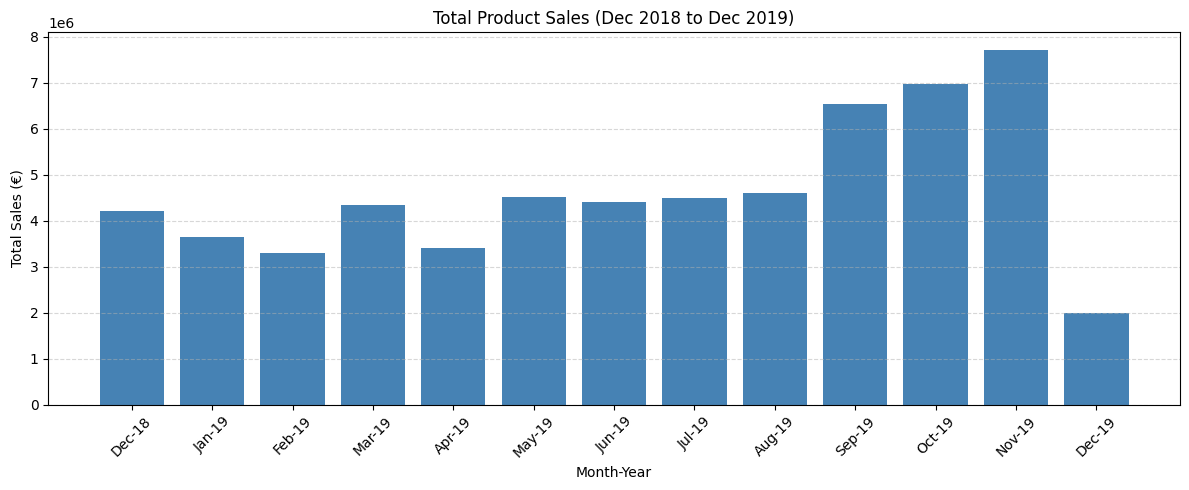

output saved at: /home/Isha/USD/usd_project_aai_500/AAI-500-IN1_PROJECT/visuals/eda_charts/Total_product_sales.png


In [30]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Filter data from Dec 2018 to Dec 2019
df_filtered = df[(df['Date'] >= '2018-12-01') & (df['Date'] <= '2019-12-31')].copy()

# Create Month-Year labels
df_filtered['YearMonth'] = df_filtered['Date'].dt.to_period('M').astype(str)

# Group and sum sales
monthly_sales = df_filtered.groupby('YearMonth')['TotalSales'].sum().reset_index()

# Convert 'YearMonth' to datetime for sorting, then back to string for plotting
monthly_sales['MonthDate'] = pd.to_datetime(monthly_sales['YearMonth'])
monthly_sales = monthly_sales.sort_values('MonthDate')
monthly_sales['Label'] = monthly_sales['MonthDate'].dt.strftime('%b-%y')

# Plot bar chart
plt.figure(figsize=(12, 5))
plt.bar(monthly_sales['Label'], monthly_sales['TotalSales'], color='steelblue')

plt.title("Total Product Sales (Dec 2018 to Dec 2019)")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales (€)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
# Save the figure
output_file = os.path.join(output_dir, "Total_product_sales.png")
plt.savefig(output_file, dpi=300, bbox_inches='tight')

plt.show()

print(f"output saved at: {output_file}")

#### Finding: 
    - There is a consistene increase in sales as we approach the end of the year. 
    - The probable reason is due to festive seasons at the end of the year.
#### Note: The data availability is till 9 Dec 2019

## Week Group Correlation with Total Monthly Sales

In [31]:
# Define WeekGroup as per week number
def map_week(w):
    if w in [1]:
        return "Week1"
    elif w in [2]:
        return "Week2"
    elif w in [3]:
        return "Week3"
    else:
        return "Week4-5"

df_positive["WeekGroup"] = df_positive["Week"].apply(map_week)

# Group by Month and WeekGroup and sum sales
grouped = df_positive.groupby(["Month", "WeekGroup"])["TotalSales"].sum().reset_index()

# Pivot to have weeks as columns and months as rows
pivot = grouped.pivot(index="Month", columns="WeekGroup", values="TotalSales")

# Fill missing values with 0 (if any)
pivot = pivot.fillna(0)

# Compute correlation matrix (weeks vs weeks across months)
correlation_matrix = pivot.corr()

# Display correlation of each week with others
print(" Correlation matrix of week-group sales across months:\n")
print(correlation_matrix)

# Identify which week has the strongest correlation with total monthly sales
# First, compute row-wise sum as approximation of total monthly sales
pivot["TotalMonthlySales"] = pivot.sum(axis=1)

# Now compute correlation of each week with total monthly sales
week_corr = pivot.drop(columns="TotalMonthlySales").corrwith(pivot["TotalMonthlySales"])

print("\n Correlation of each week with total monthly sales:\n")
print(week_corr.sort_values(ascending=False))

 Correlation matrix of week-group sales across months:

WeekGroup     Week1     Week2     Week3   Week4-5
WeekGroup                                        
Week1      1.000000  1.000000  1.000000 -0.628278
Week2      1.000000  1.000000  1.000000 -0.628278
Week3      1.000000  1.000000  1.000000 -0.628278
Week4-5   -0.628278 -0.628278 -0.628278  1.000000

 Correlation of each week with total monthly sales:

WeekGroup
Week4-5    0.860310
Week1     -0.143918
Week2     -0.143918
Week3     -0.143918
dtype: float64


/tmp/ipykernel_4217/953194867.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Sales Forecast with Linear Regression

/home/Isha/anaconda3/envs/usd_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



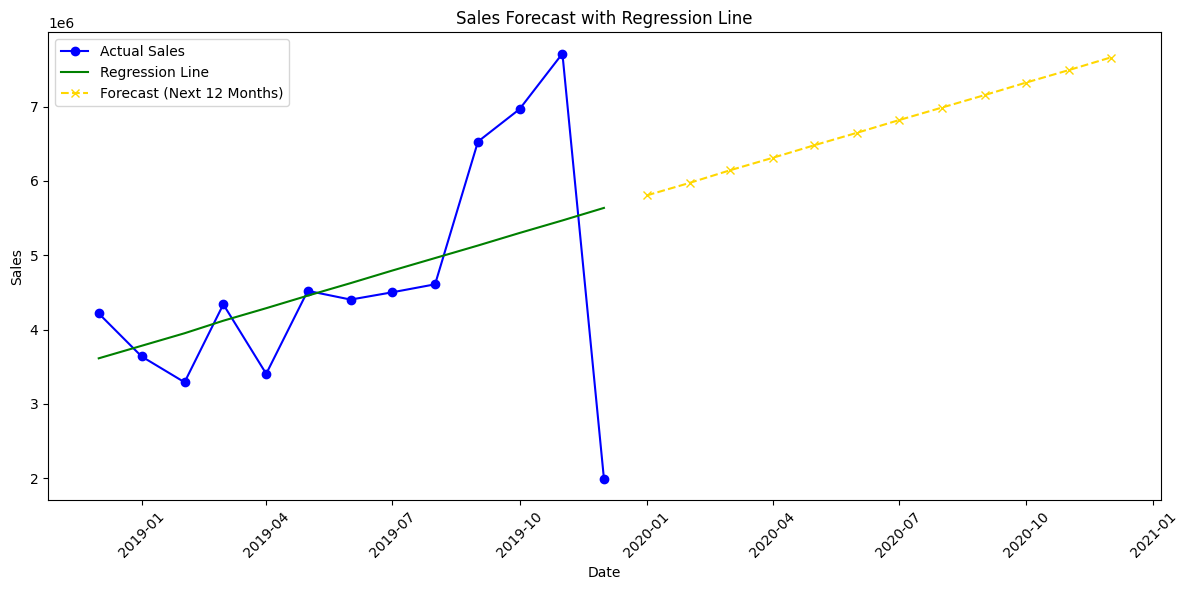

output saved at: /home/Isha/USD/usd_project_aai_500/AAI-500-IN1_PROJECT/visuals/eda_charts/Sales_Forecast_with_Linear_Regression.png


In [32]:
from sklearn.linear_model import LinearRegression
# Ensure Date is datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Group by Year-Month and sum sales
df['YearMonth'] = df['Date'].dt.to_period('M').astype(str)
monthly_sales = df.groupby('YearMonth')['TotalSales'].sum().reset_index()

# Convert YearMonth to datetime for plotting and modeling
monthly_sales['YearMonth'] = pd.to_datetime(monthly_sales['YearMonth'])
monthly_sales = monthly_sales.sort_values('YearMonth')

# Create a numeric column for time
monthly_sales['TimeIndex'] = np.arange(len(monthly_sales))

# Features and target
X = monthly_sales[['TimeIndex']]
y = monthly_sales['TotalSales']

# Train linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict on historical data
monthly_sales['Predicted'] = model.predict(X)

# Predict future
future_months = 12
future_index = np.arange(len(monthly_sales), len(monthly_sales) + future_months).reshape(-1, 1)
future_sales = model.predict(future_index)

# Generate future dates
last_date = monthly_sales['YearMonth'].max()
future_dates = pd.date_range(start=last_date + pd.offsets.MonthBegin(1), periods=future_months, freq='MS')

# Build forecast DataFrame
forecast_df = pd.DataFrame({
    'YearMonth': future_dates,
    'PredictedSales': future_sales
})

# Plotting
plt.figure(figsize=(12, 6))

# Actual sales
plt.plot(monthly_sales['YearMonth'], monthly_sales['TotalSales'], label='Actual Sales', marker='o', color='blue')

# Regression line on historical data (green)
plt.plot(monthly_sales['YearMonth'], monthly_sales['Predicted'], label='Regression Line', color='green')

# Prediction line for future (yellow)
plt.plot(forecast_df['YearMonth'], forecast_df['PredictedSales'], label='Forecast (Next 12 Months)', linestyle='--', marker='x', color='gold')

# Final touches
plt.title('Sales Forecast with Regression Line')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
# Save the figure
output_file = os.path.join(output_dir, "Sales_Forecast_with_Linear_Regression.png")
plt.savefig(output_file, dpi=300, bbox_inches='tight')

plt.show()

print(f"output saved at: {output_file}")

#### Finding: We can see that the trend of sales is linear with positive growth

## Cancellation Analysis

In [33]:
# Filter only cancelled transactions (negative sales)
cancelled_orders = df[df['TotalSales'] < 0]

# Total value of cancellations
total_cancellations = cancelled_orders['TotalSales'].sum()

print("Total Value of Cancellations:", round(total_cancellations, 2))
print("Number of Cancelled Transactions:", len(cancelled_orders))
print('Cancellation percentage is ', round(-total_cancellations*100/(df['TotalSales'].sum()),2),'%')

Total Value of Cancellations: -2646715.27
Number of Cancelled Transactions: 8494
Cancellation percentage is  4.4 %


#### Recommendation: Since cancellation percentage is very high, at 4.4%, efforts should be made to reduce this value.

## Cancellations by Country

In [34]:
cancel_by_country = cancelled_orders.groupby('Country')['TotalSales'].sum().sort_values()
print(cancel_by_country.head(20))  # Most negative = highest cancellations

Country
United Kingdom   -2491406.76
EIRE               -52765.88
Germany            -21277.87
USA                -15418.27
Spain              -15273.47
France             -13758.64
Japan               -9861.97
Australia           -6851.56
Sweden              -5837.28
Netherlands         -3742.20
Switzerland         -3545.64
Italy               -1139.02
Norway              -1067.73
Czech Republic       -917.64
Portugal             -840.95
Belgium              -784.90
Denmark              -644.87
Austria              -598.96
Finland              -374.29
Malta                -208.12
Name: TotalSales, dtype: float64


In [35]:
#Group by ProductName to get total cancellation value
cancelled_products = cancelled_orders.groupby('ProductName')['TotalSales'].sum().sort_values().head(20)

#Get top 20 cancelled product names
top_20_names = cancelled_products.index.tolist()

#Filter original cancelled_orders for these top 20 products
top_20_df = cancelled_orders[cancelled_orders['ProductName'].isin(top_20_names)]

#Group by both ProductName and ProductNo to include Product ID
#and get Total Cancellations and Average Price
summary = top_20_df.groupby(['ProductName', 'ProductNo']).agg({
    'TotalSales': 'sum',
    'Price': 'mean'
}).sort_values(by='TotalSales')

# Display the result
summary = summary.rename(columns={'TotalSales': 'CancelledValue', 'Price': 'AvgPrice'})
print(summary)

                                               CancelledValue   AvgPrice
ProductName                         ProductNo                           
Medium Ceramic Top Storage Jar      23166          -843277.96  11.446000
Paper Craft Little Birdie           23843          -501359.05   6.190000
Rotating Silver Angels T-Light Hldr 84347           -96310.82  12.000000
Fairy Cake Flannel Assorted Colour  21108           -38921.40   9.833333
Cream Hanging Heart T-Light Holder  85123A          -33190.99  12.796190
Gin And Tonic Diet Metal Sign       21175           -24684.61  12.588571
Feltcraft Doll Molly                22273           -18424.21  11.911667
Tea Time Party Bunting              47566B          -18376.16  13.952857
Regency Cakestand 3 Tier            22423           -18148.61  21.787833
Herb Marker Basil                   22920           -16508.19  10.865000
Coloured Glass Star T-Light Holder  71477           -15694.95  11.861613
Pink Blue Felt Craft Trinket Box    20971          

## Top 20 Cancelled Products Analysis

In [36]:
# Step 1: Group by product and sum total sales
product_sales = df_positive.groupby(['ProductNo', 'ProductName'])['TotalSales'].sum().reset_index()

# Step 2: Filter products whose total sales < 50
low_sales_products = product_sales[product_sales['TotalSales'] < 50]

# Step 3: Display the result
print(low_sales_products[['ProductNo', 'ProductName', 'TotalSales']])

     ProductNo                          ProductName  TotalSales
105     17191A   Rose Flower Candle+Incense 16x16cm       42.66
139      20678       Large Black Diamante Hairslide       47.76
155      20703              Blue Padded Soft Mobile       14.61
241      20860    Gold Cosmetics Bag With Butterfly       12.40
242      20861          Gold Cosmetic Bag Pink Star       24.80
...        ...                                  ...         ...
3654    90178B    Purple Chunky Glass+Bead Necklace       22.50
3656    90179B   Purple Fine Bead Necklace W Tassel       28.39
3662    90181C     Black Glass/Shell/Pearl Necklace       19.63
3678    90187A    Blue Drop Earrings W Bead Cluster       13.65
3681    90189A  Silver 2 Strand Necklace-Leaf Charm       35.88

[146 rows x 3 columns]


In [37]:
low_sales_products['TotalSales'].sum()

np.float64(3960.09)

#### Recommendation: As the overall sales is less, these items can be removed from the inventory.

## Cancellation Analysis for Products Priced > £100

In [38]:
ts_100=df_positive[df_positive['Price']>100]['TotalSales'].sum()
co=cancelled_orders[cancelled_orders['Price']>100]['TotalSales'].sum()
print('Total value of orders  for product price>100 is', round((ts_100), 2))
print('Total value of cancelled orders for product price>100 is', round((-co), 2))
print('Precentage of cancelled orders(Price >$100)  ', round((-co*100/ts_100),2))

Total value of orders  for product price>100 is 67626.68
Total value of cancelled orders for product price>100 is 10555.46
Precentage of cancelled orders(Price >$100)   15.61


#### Recommendation:
    - Percentage of cancelled orders in high value items is very high (Almost 16%, as compared to average 4.4%).
    - The company should take steps to either remove these items from inventory or take these a feedback from customers based on their preferences. 